In [34]:
import pickle 
with open('protocal_result_fix.pkl', 'rb') as f:
    all_res = pickle.load(f)

from qiskit.visualization import plot_histogram

# for bitstring, state_count in  all_res.items():
#     fig = plot_histogram(state_count, title = bitstring, figsize=(18,12))
#     fig.show()
#     break

In [42]:
all_res
110012000001022121

100002000000022020
100012000000022020

{'110012000001022121': {'100002000000022020': 0.32,
  '100002000000022120': 0.044,
  '100002000000122020': 0.008,
  '100002000000122120': 0.002,
  '100002010000022020': 0.011,
  '100002010000022120': 0.002,
  '100012000000022020': 0.393,
  '100012000000022021': 0.006,
  '100012000000022120': 0.083,
  '100012000000122020': 0.007,
  '100012000000122120': 0.001,
  '100012010000022020': 0.013,
  '100012010000022120': 0.002,
  '101002000000022020': 0.046,
  '101002000000022120': 0.009,
  '101012000000022020': 0.046,
  '101012000000022120': 0.006,
  '101012010000022020': 0.001},
 '101120010100011022': {'100020000000010022': 0.003,
  '100020010000000022': 0.009,
  '100020010000010022': 0.015,
  '100021000000000022': 0.002,
  '100021000000010022': 0.002,
  '100021010000000022': 0.003,
  '100021010000010022': 0.019,
  '100021010000110022': 0.001,
  '101020000000000022': 0.006,
  '101020000000010022': 0.038,
  '101020010000000022': 0.072,
  '101020010000000122': 0.001,
  '101020010000010022': 0.

In [43]:
new_res = {}
for bitstring ,state_count in  all_res.items():
     new_bitstring = bitstring[0:8]+bitstring[13:15]+bitstring[17]
     new_state_count = {}
     for measure_bitstring, count in state_count.items():
          new_measure_bitstring = measure_bitstring[0:8]+measure_bitstring[13:15]+measure_bitstring[17]
          if new_measure_bitstring not in new_state_count:
               new_state_count[new_measure_bitstring] = count
          else:
               new_state_count[new_measure_bitstring] += count
     new_res[new_bitstring] = new_state_count


In [44]:
new_res

{'11001200221': {'10000200220': 0.374,
  '10000201220': 0.013,
  '10001200220': 0.48400000000000004,
  '10001200221': 0.006,
  '10001201220': 0.015,
  '10100200220': 0.055,
  '10101200220': 0.052,
  '10101201220': 0.001},
 '10112001112': {'00002000112': 0.001,
  '00002001012': 0.001,
  '00002001112': 0.004,
  '00012000112': 0.001,
  '00012001012': 0.003,
  '00012001112': 0.004,
  '00102000012': 0.001,
  '00102000112': 0.001,
  '00102001012': 0.004,
  '00102001102': 0.002,
  '00102001112': 0.008,
  '00112000012': 0.003,
  '00112000112': 0.006,
  '00112001012': 0.019000000000000003,
  '00112001102': 0.002,
  '00112001112': 0.03400000000000001,
  '00112011112': 0.002,
  '00112011012': 0.002,
  '00112101112': 0.001,
  '01012001112': 0.001,
  '10002000012': 0.001,
  '10002001012': 0.004,
  '10002001102': 0.002,
  '10002001112': 0.013000000000000001,
  '10012000012': 0.001,
  '10012000112': 0.011000000000000001,
  '10012000002': 0.001,
  '10012000102': 0.001,
  '10012001002': 0.001,
  '10012

In [31]:
import numpy as np
np.set_printoptions(suppress=True)

In [45]:
measure_success = np.zeros(shape=(18, 3))
n_measures = np.zeros(shape=(18, 3))
 
for real_bitstring, status_count in new_res.items():
    
    real_bitstring = [int(bit) for bit in real_bitstring]
    for measure_bitstring, count in status_count.items():
        for qubit, value in enumerate(measure_bitstring):
            real_value = real_bitstring[qubit]
            value = int(value)
            if value == real_value:
                measure_success[qubit][real_value] += count
            n_measures[qubit][real_value] += count

measure_fids = measure_success/n_measures

/tmp/ipykernel_2584572/1159417193.py:15: RuntimeWarning: invalid value encountered in divide
  measure_fids = measure_success/n_measures


In [46]:
measure_fids

array([[0.93689918, 0.89720585, 1.        ],
       [0.97652794, 0.88265688, 1.        ],
       [0.96571557, 0.89972775, 1.        ],
       [0.97455228, 0.76122496, 1.        ],
       [0.96752125, 0.88630053, 1.        ],
       [0.9705534 , 0.88061348, 1.        ],
       [0.96382356, 0.87020128, 1.        ],
       [0.97289583, 0.84701693, 1.        ],
       [0.97992246, 0.71569076, 1.        ],
       [0.91670185, 0.90921162, 1.        ],
       [0.98444878, 0.73602911, 1.        ],
       [       nan,        nan,        nan],
       [       nan,        nan,        nan],
       [       nan,        nan,        nan],
       [       nan,        nan,        nan],
       [       nan,        nan,        nan],
       [       nan,        nan,        nan],
       [       nan,        nan,        nan]])

In [40]:
np.where(measure_fids[:,1] > 0.7)
len([ 0,  1,  2,  3,  4,  5,  6,  7, 13, 14, 17])
#[ 0,  1,  2,  3,  4,  5,  6,  7, 13, 14, 17]

11

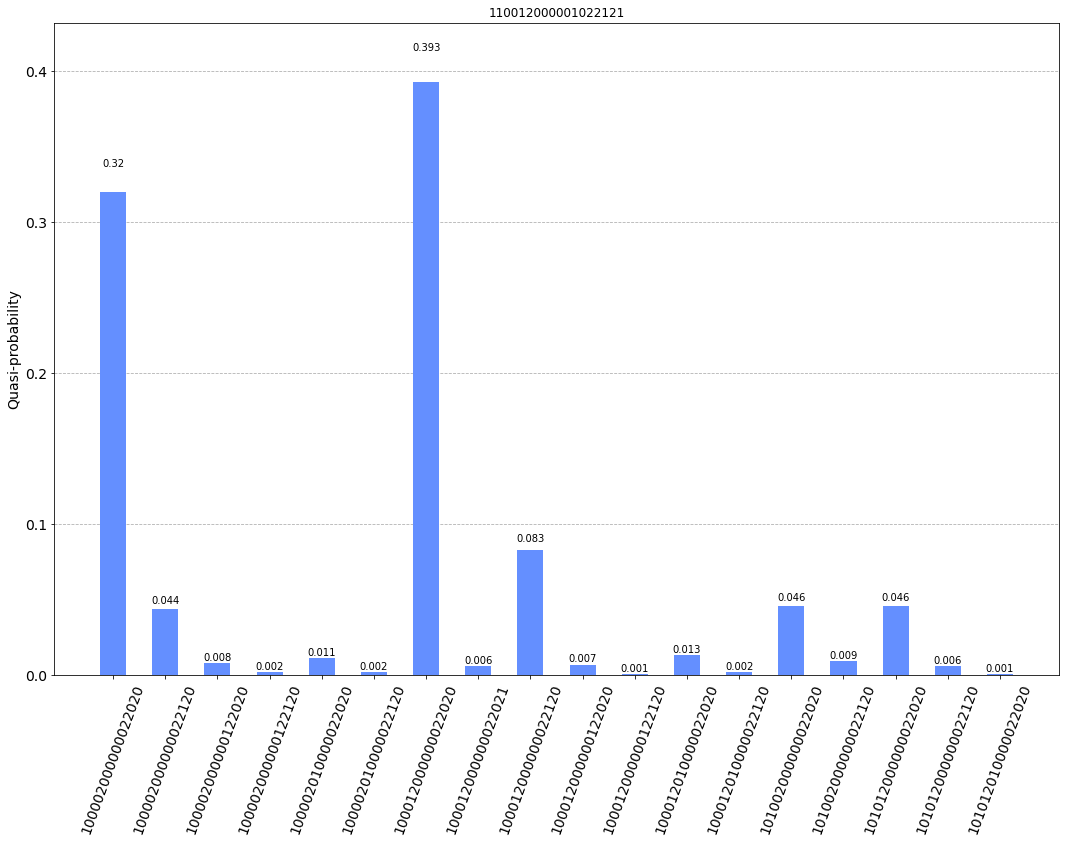

In [10]:
fig